In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
import os
# Plotting / display config
plt.style.use("ggplot")
pd.set_option("display.max_colwidth", 200)
sns.set_palette("Set2")

# Create output folder
os.makedirs("../outputs/figures/", exist_ok=True)


In [2]:
# Load dataset
df = pd.read_csv("../data/toxic_spans.csv")
df.head(2)


,probability,position,text,type,support,text_of_post,position_probability
0,"{(75, 79): 0.3333333333333333, (242, 246): 0.3333333333333333, (201, 207): 0.3333333333333333}",[],"{'look': 0.3333333333333333, 'idiots': 0.3333333333333333, 'damn': 0.3333333333333333}",{'insult': 0.6666666666666666},3,"It all took place in a matter of minutes. The moose looks young and didn't look angry until multiple skiers whizzing past him or her, taking video, calling out to one another and generally acting ...","{75: 0.3333333333333333, 76: 0.3333333333333333, 77: 0.3333333333333333, 78: 0.3333333333333333, 242: 0.3333333333333333, 243: 0.3333333333333333, 244: 0.3333333333333333, 245: 0.3333333333333333,..."
1,"{(134, 140): 0.3333333333333333, (55, 61): 0.3333333333333333}",[],"{'idiots': 0.3333333333333333, 'Idiots': 0.3333333333333333}",{'insult': 0.3333333333333333},3,"Dumb analogy. Most beaches are watched by lifeguards. ""Idiots"" entering in conditions way over their heads are warned or rescued. The idiots who enter closed trails and get in way over their heads...","{134: 0.3333333333333333, 135: 0.3333333333333333, 136: 0.3333333333333333, 137: 0.3333333333333333, 138: 0.3333333333333333, 139: 0.3333333333333333, 55: 0.3333333333333333, 56: 0.333333333333333..."


In [3]:
# Preprocess span and compute stats
df["position"] = df["position"].apply(ast.literal_eval)
df["span_length"] = df["position"].apply(len)
df["char_count"] = df["text_of_post"].str.len()
df["span_coverage_pct"] = df["span_length"] / df["char_count"]
df.head(2)


,probability,position,text,type,support,text_of_post,position_probability,span_length,char_count,span_coverage_pct
0,"{(75, 79): 0.3333333333333333, (242, 246): 0.3333333333333333, (201, 207): 0.3333333333333333}",[],"{'look': 0.3333333333333333, 'idiots': 0.3333333333333333, 'damn': 0.3333333333333333}",{'insult': 0.6666666666666666},3,"It all took place in a matter of minutes. The moose looks young and didn't look angry until multiple skiers whizzing past him or her, taking video, calling out to one another and generally acting ...","{75: 0.3333333333333333, 76: 0.3333333333333333, 77: 0.3333333333333333, 78: 0.3333333333333333, 242: 0.3333333333333333, 243: 0.3333333333333333, 244: 0.3333333333333333, 245: 0.3333333333333333,...",0,292,0.0
1,"{(134, 140): 0.3333333333333333, (55, 61): 0.3333333333333333}",[],"{'idiots': 0.3333333333333333, 'Idiots': 0.3333333333333333}",{'insult': 0.3333333333333333},3,"Dumb analogy. Most beaches are watched by lifeguards. ""Idiots"" entering in conditions way over their heads are warned or rescued. The idiots who enter closed trails and get in way over their heads...","{134: 0.3333333333333333, 135: 0.3333333333333333, 136: 0.3333333333333333, 137: 0.3333333333333333, 138: 0.3333333333333333, 139: 0.3333333333333333, 55: 0.3333333333333333, 56: 0.333333333333333...",0,391,0.0


In [4]:
# Basic statistics
summary = {
    "total_samples": len(df),
    "avg_text_length": df["char_count"].mean(),
    "avg_span_length": df["span_length"].mean(),
    "avg_coverage_pct": df["span_coverage_pct"].mean(),
}
print(summary)
pd.DataFrame([summary]).to_csv("../outputs/figures/toxic_spans_stats.csv", index=False)


{'total_samples': 11006, 'avg_text_length': 208.14292204252226, 'avg_span_length': 4.079774668362711, 'avg_coverage_pct': 0.05354925823571611}


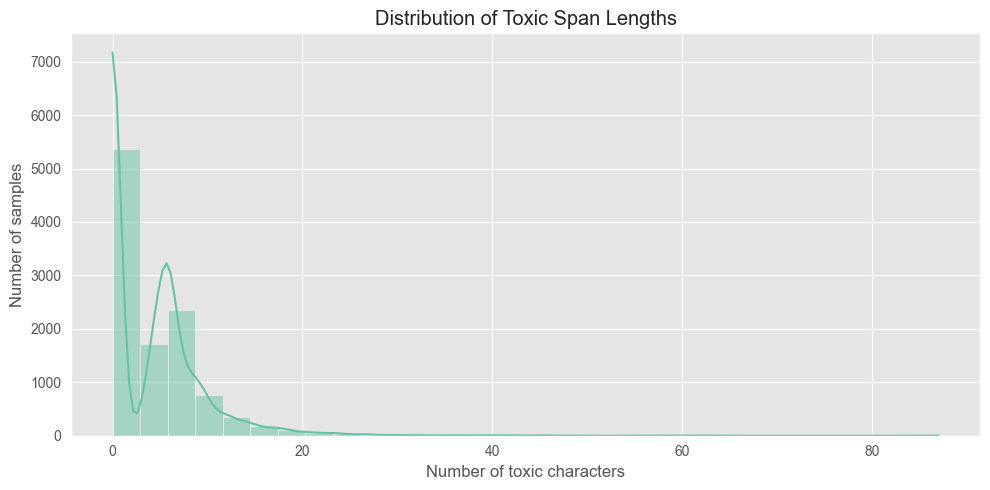

In [5]:
# Span length distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["span_length"], bins=30, kde=True)
plt.title("Distribution of Toxic Span Lengths")
plt.xlabel("Number of toxic characters")
plt.ylabel("Number of samples")
plt.tight_layout()
plt.savefig("../outputs/figures/span_length_distribution.png")
plt.show()


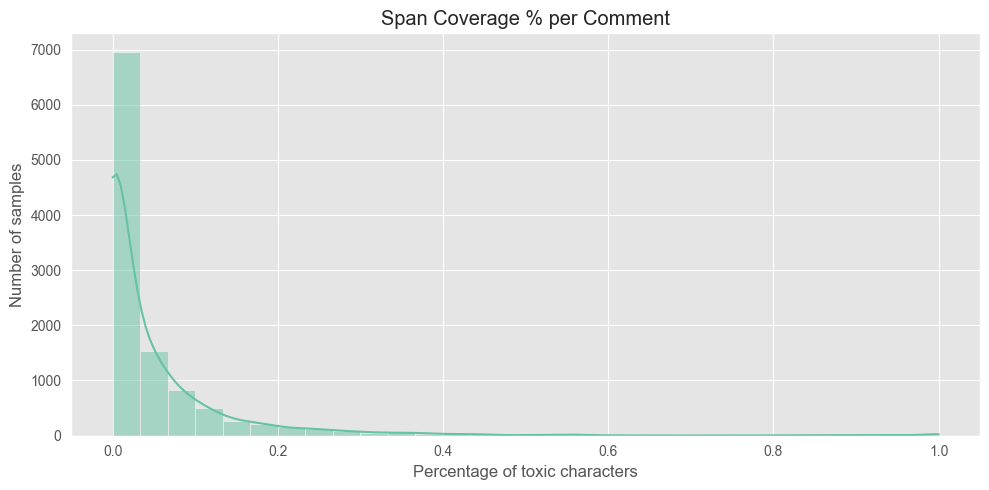

In [6]:
# Span coverage distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["span_coverage_pct"], bins=30, kde=True)
plt.title("Span Coverage % per Comment")
plt.xlabel("Percentage of toxic characters")
plt.ylabel("Number of samples")
plt.tight_layout()
plt.savefig("../outputs/figures/span_coverage_distribution.png")
plt.show()


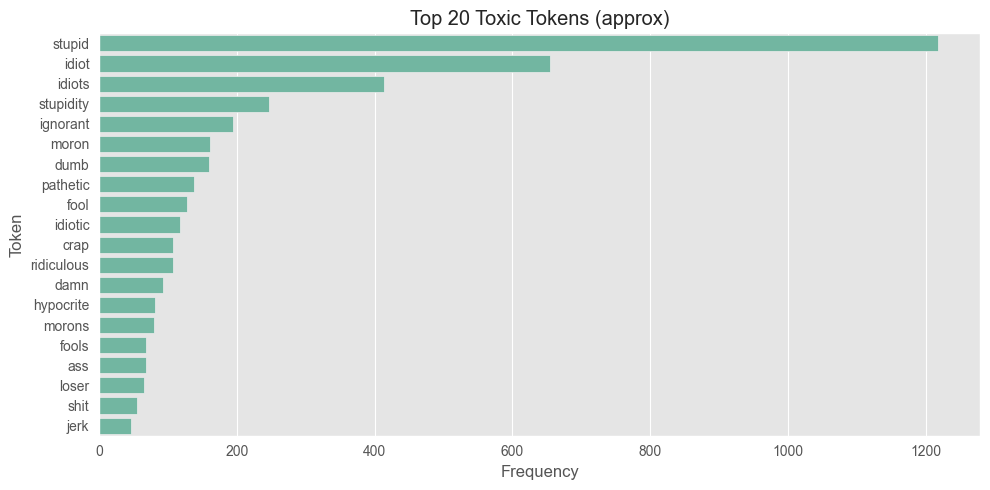

In [7]:
# Most common toxic tokens
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

char_positions = df["position"]
texts = df["text_of_post"]
tokens = []

for i in range(len(df)):
    pos_set = set(char_positions[i])
    text = texts[i]
    word = ""
    for j, c in enumerate(text):
        if c.isalnum():
            word += c
        else:
            if word and any(idx in pos_set for idx in range(j - len(word), j)):
                tokens.append(word.lower())
            word = ""
    if word and any(idx in pos_set for idx in range(len(text) - len(word), len(text))):
        tokens.append(word.lower())

# Filter out stopwords to focus on more informative tokens
filtered = [t for t in tokens if t not in ENGLISH_STOP_WORDS]
top = Counter(filtered).most_common(20)

words, freqs = zip(*top)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(freqs), y=list(words))
plt.title("Top 20 Toxic Tokens (approx)")
plt.xlabel("Frequency")
plt.ylabel("Token")
plt.tight_layout()
plt.savefig("../outputs/figures/top_toxic_tokens.png")
plt.show()


In [8]:
# HTML-highlighted toxic spans (save to HTML)
def highlight_span(row):
    text = row["text_of_post"]
    span = set(row["position"])
    marked = "".join(f"<mark>{c}</mark>" if i in span else c for i, c in enumerate(text))
    return f"<p>{marked}</p>"

highlighted_html = "\n<hr>\n".join([highlight_span(df.iloc[i]) for i in range(10)])
with open("../outputs/figures/toxic_span_examples.html", "w", encoding="utf-8") as f:
    f.write(highlighted_html)


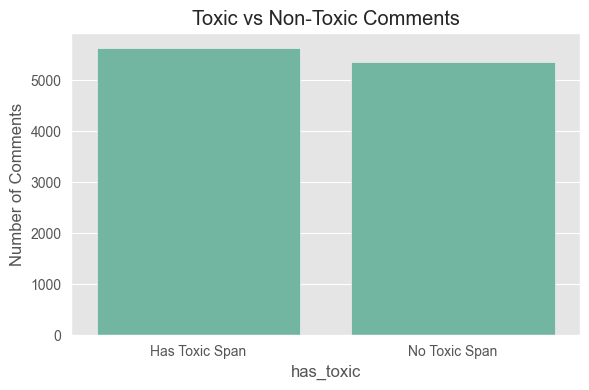

In [9]:
# Toxic vs. Non-Toxic Comments Count
df["has_toxic"] = df["span_length"] > 0
toxic_counts = df["has_toxic"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=toxic_counts.index.map({True: "Has Toxic Span", False: "No Toxic Span"}), y=toxic_counts.values)
plt.title("Toxic vs Non-Toxic Comments")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.savefig("../outputs/figures/toxic_vs_nontoxic.png")
plt.show()

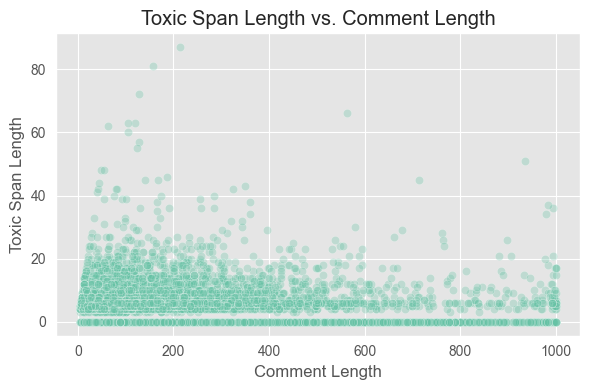

In [10]:
# Correlation - Comment Length vs. Toxic Span Length
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["char_count"], y=df["span_length"], alpha=0.3)
plt.title("Toxic Span Length vs. Comment Length")
plt.xlabel("Comment Length")
plt.ylabel("Toxic Span Length")
plt.tight_layout()
plt.savefig("../outputs/figures/span_vs_length.png")
plt.show()